In [1]:
import numpy as np
from tqdm import tqdm
import anndata as ad
import sys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc
from scipy.io import savemat, loadmat
import os
import pandas as pd

In [2]:
data_folder = 'data/thomsonlab_signaling/'
large_data_folder = 'large_data/thomsonlab_signaling/'
fig_folder = 'figure/thomsonlab_signaling/'

In [3]:
cadata = ad.read_h5ad(large_data_folder + 'thomsonlab_signaling_filtered_2500_scvi_umap.h5ad')

/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [2]:
import os
print(os.getcwd())

/Users/ygong/git/DSPIN-abstract


In [8]:
import os
# make dictionary
os.mkdir("./test/test090404")
os.mkdir("./test/test090404/figs")

In [9]:
seed = 0
num_spin = 20
num_pool = num_spin
num_repeat = 10
task_name = "thomsonlab_signaling"
save_path = "./test/test090404/"

## Test with DSPIN Class

In [10]:
from util.dspin import DSPIN

In [35]:
# Reload the Package
from importlib import reload
import util.dspin  
reload(util.dspin)  
from util.dspin import DSPIN 

In [11]:
a = DSPIN(cadata, save_path, num_spin)

/Users/ygong/git/DSPIN-abstract/util/dspin.py:76: UserWarning: num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.
  warnings.warn("num_spin larger than 10 takes long time in Python. Please use computing clusters for larger num_spin.")


In [8]:
a.gene_program_csv = 'test/test_signalling/onmf_gene_list_20.csv'

Pre-computing
Round_1


Iteration Progress: 100%|██████████| 50/50 [00:14<00:00,  3.40it/s, Reconstruction Error=7132.46]


Round_2


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.63it/s, Reconstruction Error=7652.36]


Round_3


Iteration Progress: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s, Reconstruction Error=7652.32]


Round_4


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.74it/s, Reconstruction Error=7680.09]


Round_5


Iteration Progress: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s, Reconstruction Error=7692.10]


Round_6


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.78it/s, Reconstruction Error=7699.39]


Round_7


Iteration Progress: 100%|██████████| 50/50 [00:20<00:00,  2.47it/s, Reconstruction Error=7683.47]


Round_8


Iteration Progress: 100%|██████████| 50/50 [00:16<00:00,  3.04it/s, Reconstruction Error=7687.54]


Round_9


Iteration Progress: 100%|██████████| 50/50 [00:17<00:00,  2.94it/s, Reconstruction Error=7690.86]


Round_10


Iteration Progress: 100%|██████████| 50/50 [00:18<00:00,  2.66it/s, Reconstruction Error=7701.16]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Discretize ONMF representation into three states


100%|██████████| 20/20 [00:02<00:00,  6.75it/s]
/Users/ygong/anaconda3/envs/be206/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


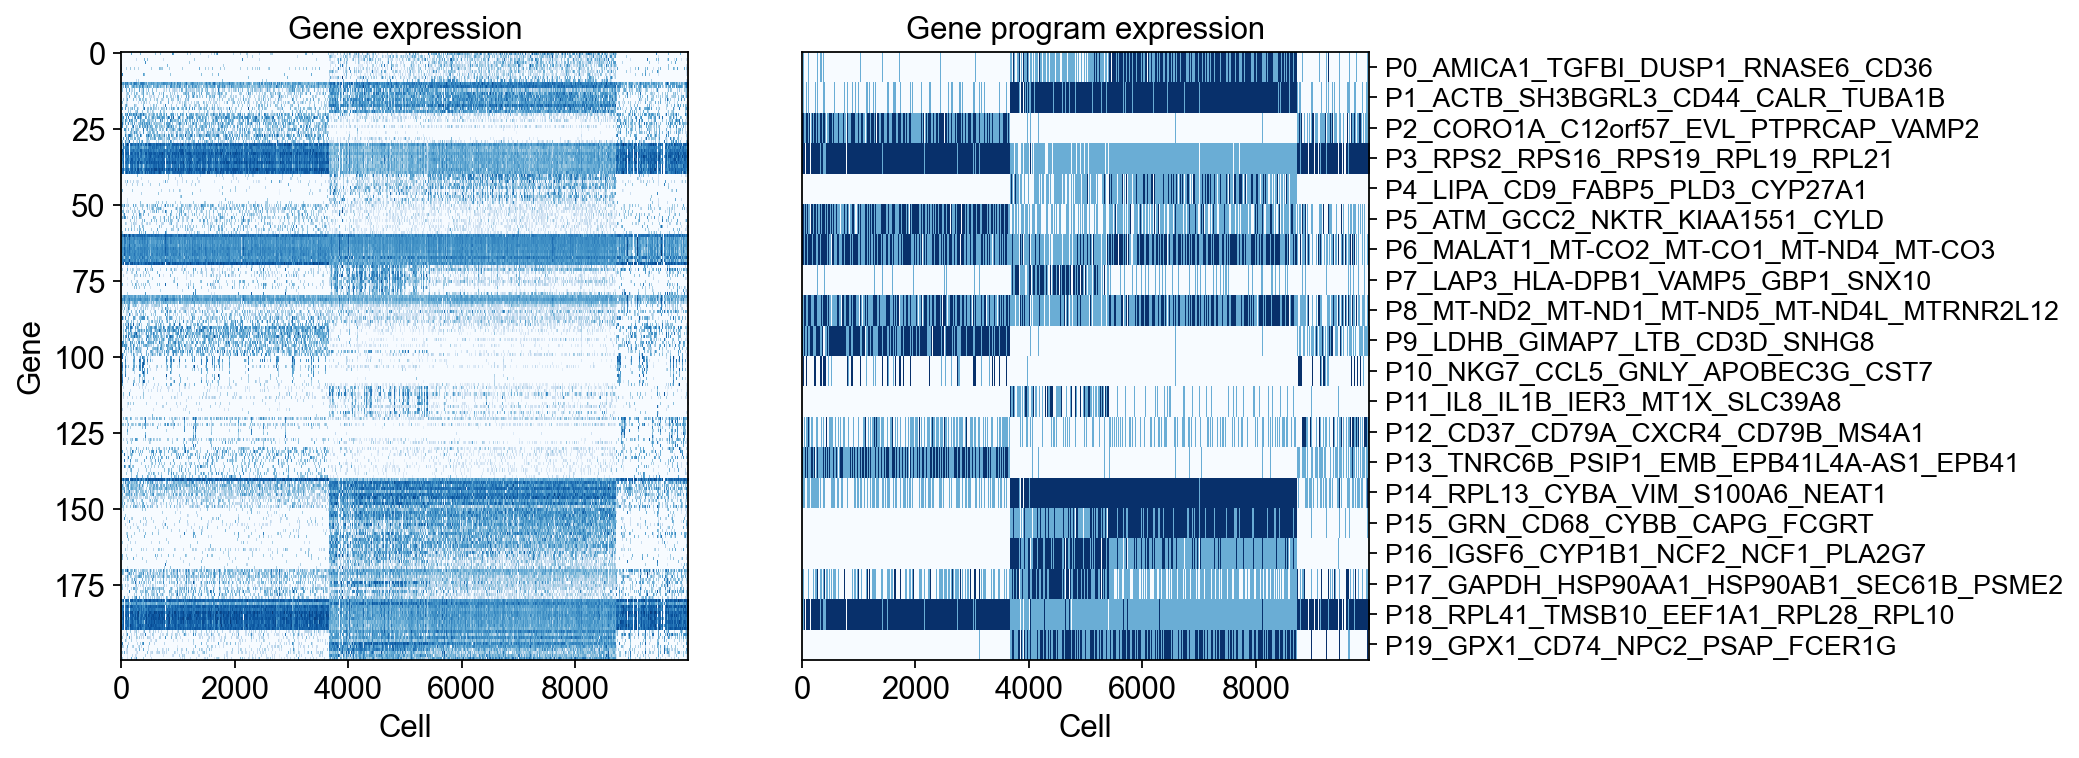

In [12]:
a.gene_program_discovery(sample_column_name= 'sample_batch')

In [13]:
example_list = ['TNFA_200ng_mL_1-COVID-1', 'IL7_50ng_mL_1-COVID-1', 'LPS_50ng_mL_1-COVID-1', 'CCL2_200ng_mL_1-COVID-1', 'CONTROL_1-COVID-1']

In [14]:
a.samplingsz = 5e6

In [15]:
a.network_infer(example_list=example_list)

Progress: 13, Network gradient: 9.367212
Progress: 20, Network gradient: 7.843157
Progress: 26, Network gradient: 6.798151
Progress: 33, Network gradient: 6.121257
Progress: 40, Network gradient: 5.514320
Progress: 46, Network gradient: 4.957665
Progress: 53, Network gradient: 4.518856
Progress: 60, Network gradient: 4.153958
Progress: 66, Network gradient: 3.803699
Progress: 73, Network gradient: 3.520614
Progress: 80, Network gradient: 3.302183
Progress: 86, Network gradient: 3.075009
Progress: 93, Network gradient: 2.871804
Progress: 100, Network gradient: 2.717961


In [14]:
a.network_infer(example_list=example_list)

Progress: 13, Network gradient: 13.826810
Progress: 20, Network gradient: 4.756778
Progress: 26, Network gradient: 4.897365
Progress: 33, Network gradient: 3.159260
Progress: 40, Network gradient: 2.798601
Progress: 46, Network gradient: 1.893549
Progress: 53, Network gradient: 1.691980
Progress: 60, Network gradient: 1.436020
Progress: 66, Network gradient: 1.213206
Progress: 73, Network gradient: 1.094372
Progress: 80, Network gradient: 0.980657
Progress: 86, Network gradient: 1.071950
Progress: 93, Network gradient: 0.813597
Progress: 100, Network gradient: 1.035872


In [35]:
a.raw_data = np.load('test/raw_data_c.npy', allow_pickle=True)

In [29]:
inner_matrix = a.raw_data.flatten()

In [31]:
inner_matrix.shape

(108,)

In [24]:
cur_j, cur_h = a.network, a.responses

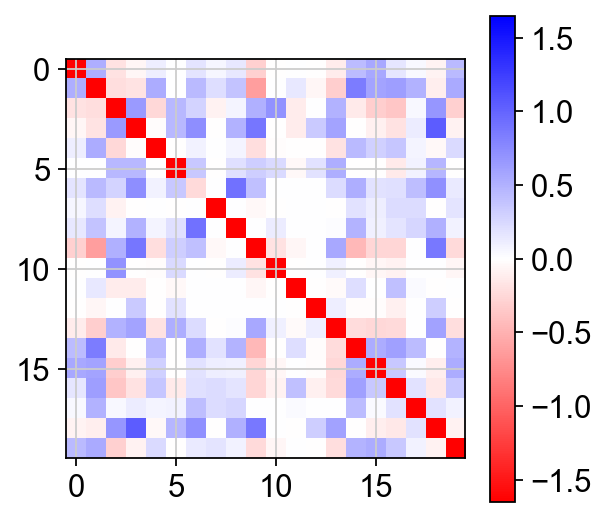

In [25]:
sc.set_figure_params(figsize=[4, 4])

j_thres = np.max(np.abs(cur_j)) / 1.5
j_thre = 1
plt.imshow(cur_j, cmap='bwr_r', vmin=- j_thres, vmax=j_thres)
plt.colorbar()

In [20]:
train_dat = {'epoch': 150, 'spin_thres': 16,
             'stepsz': 0.02, 'dropout': 0, 'counter': 1,
             'samplingsz': 5e6, 'samplingmix': 1e3, 'rec_gap': 10,
             'lam_l2h': 0.005, 'lam_l1j': 0.01}

In [21]:
a.epoch = train_dat['epoch']
a.spin_thres = train_dat['spin_thres']
a.stepsz = train_dat['stepsz']
a.dropout = train_dat['dropout']
a.counter = train_dat['counter']
a.samplingsz = train_dat['samplingsz']
a.samplingmix = train_dat['samplingmix']
a.rec_gap = train_dat['rec_gap']
a.lam_l2h = train_dat['lam_l2h']
a.lam_l1j = train_dat['lam_l1j']

### Directly Load onmf Summary

In [9]:
onmf_summary = np.load('test/test_signalling/onmf_summary_20.npy', allow_pickle=True).item()

In [10]:
a.onmf_summary = onmf_summary

In [11]:
a.matrix_balance()

### Verification the Correctness of ONMF Representation

In [ ]:
from util.plotting import onmf_gene_program_info

num_gene_show = 20
features = a.onmf_summary.components_
gene_name = cadata.var_names

onmf_gene_program_info(features, gene_name, num_gene_show, fig_folder)

#### Visualization of gene program decomposition

In [39]:
from importlib import reload
import util.compute
reload(util.compute)   

<module 'util.compute' from '/Users/ygong/git/DSPIN-abstract/util/compute.py'>

In [10]:
a.compute_onmf_rep_ori()

In [11]:
a.discretize()

100%|██████████| 20/20 [00:03<00:00,  6.56it/s]


In [12]:
a.onmf_rep_tri

array([[0. , 0. , 0. , ..., 1. , 0. , 0.5],
       [1. , 0. , 0. , ..., 1. , 0. , 0.5],
       [0.5, 0.5, 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0.5, 0.5, ..., 0.5, 0. , 0. ],
       [0. , 0.5, 0. , ..., 0.5, 0.5, 0. ],
       [0. , 0.5, 0.5, ..., 0.5, 0. , 0. ]])

In [13]:
onmf_rep_tri = a.onmf_rep_tri

In [14]:
from util.plotting import temporary_spin_name, gene_program_decomposition

In [47]:
spin_name = temporary_spin_name('test/test_signalling/onmf_gene_list_20.csv')

In [17]:
fig_folder = '/Users/ygong/git/DSPIN-abstract/test/test_signalling/figs'

In [19]:
gene_program_decomposition(a.onmf_summary, num_spin, spin_name, a.gene_matrix_large, onmf_rep_tri, fig_folder)

TypeError: tuple indices must be integers or slices, not tuple

In [15]:
gene_matrix = a.gene_matrix_large

In [23]:
std = a.matrix_std

In [4]:
import networkx as nx
import matplotlib.patheffects as patheffects

def plot_jmat_network(G, j_mat, ax, nodesz=1, linewz=1, node_color='k', pos=None): 
    
    self_loops = [(u, v) for u, v in G.edges() if u == v]
    G.remove_edges_from(self_loops)

    eposi= [(u, v) for (u,v,d) in G.edges(data=True) if d['weight'] > 0]
    wposi= np.array([d['weight'] for (u,v,d) in G.edges(data=True) if d['weight'] > 0])

    enega = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] < 0]
    wnega = np.array([d['weight'] for (u,v,d) in G.edges(data=True) if d['weight'] < 0])

    col1 = '#f0dab1'
    # nx.draw_networkx_nodes(G, pos, ax=ax, node_size=61.8 * nodesz, node_color=col1, edgecolors='None')
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=61.8 * nodesz, node_color=node_color, edgecolors='k')

    sig_fun = lambda xx : (1 / (1 + np.exp(- 5 * (xx + cc))))
    cc = np.max(np.abs(j_mat)) / 10
    # edges
    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=eposi, width=linewz * wposi, 
                            edge_color='#3285CC', alpha=sig_fun(wposi))

    nx.draw_networkx_edges(G, pos, ax=ax, edgelist=enega, width=- linewz * wnega, 
                            edge_color='#E84B23', alpha=sig_fun(- wnega))

    margin = 0.2
    plt.margins(x=0.1, y=0.1)

    ax.set_axis_off()
    ax.set_aspect('equal')
    return ax 

In [48]:
gene_list = spin_name

In [49]:
gene_list

['P0_PPP1R14B_APOBEC3G_CMC1_GZMM_LYAR',
 'P1_ATM_GCC2_PPP2R5C_TNRC6B_NKTR',
 'P2_FABP5_MFSD12_HMG20B_ALAS1_CD83',
 'P3_PSME2_IRF1_STAT1_LAP3_GBP1',
 'P4_NFKBIA_C15orf48_IL8_PLAUR_KYNU',
 'P5_MALAT1_MT-CO1_MT-CO2_MT-ND4_MT-CO3',
 'P6_MT-ND2_MT-ND1_TMSB10_RPL41_EEF1A1',
 'P7_GABARAP_LGMN_ZFP36_CD163_FCGR3A',
 'P8_CYBA_S100A6_NEAT1_S100A11_CD63',
 'P9_CD37_CD79A_CXCR4_CD79B_MS4A1',
 'P10_FOS_IER2_FCN1_TGFBI_FUCA1',
 'P11_AES_LDHB_GIMAP7_LTB_C12orf57',
 'P12_ATP6AP2_FCGRT_APLP2_ACP5_NCF2',
 'P13_SNHG8_GIMAP1_PIK3IP1_KLF2_CCR7',
 'P14_REL_BASP1_PPA1_MARCKS_HSPD1',
 'P15_HBB_HBA2_HBA1_SNCA_SLC25A37',
 'P16_NKG7_GNLY_CCL5_CST7_GZMA',
 'P17_RPL28_RPS2_RPS28_RPL11_RPS15',
 'P18_MT2A_MT1X_MT1F_MT1G_MT1E',
 'P19_CCNG1_AQP3_TC2N_CCDC104_TSHZ2']

In [50]:
cur_j = a.network

In [53]:
j_mat = a.responses

In [2]:
def format_label(label):
    parts = label.split('_')
    parts[1] = parts[1] + '\n'
    parts[3] = parts[3] + '\n'
    return '_'.join(parts)

In [3]:
label = 'P0_PPP1R14B_APOBEC3G_CMC1_GZMM_LYAR'
print(format_label(label))

P0_PPP1R14B
_APOBEC3G_CMC1
_GZMM_LYAR


In [57]:
def adjust_label_position(pos, offset=0.1):
    """Move labels radially outward from the center by a given offset."""
    adjusted_pos = {}
    for node, coordinates in pos.items():
        theta = np.arctan2(coordinates[1], coordinates[0])
        radius = np.sqrt(coordinates[0]**2 + coordinates[1]**2)
        adjusted_pos[node] = (coordinates[0] + np.cos(theta)*offset, coordinates[1] + np.sin(theta)*offset)
    return adjusted_pos

In [5]:
sc.set_figure_params(figsize=[18, 14])

nodesz = 2
linewz = 3
node_color = ['#f0dab1'] * num_spin
node_label = np.array([format_label(label) for label in gene_list])


fig, grid = sc.pl._tools._panel_grid(0.1, 0.1, ncols=2, num_panels=2)

cur_j_filt = cur_j.copy()
cur_j_filt[np.abs(cur_j_filt) < np.percentile(np.abs(cur_j_filt), 40)] = 0
G = nx.from_numpy_array(cur_j_filt)
pos = nx.circular_layout(G)

ax = plt.subplot(grid[1])
ax = plot_jmat_network(G, cur_j_filt, ax, nodesz=nodesz, linewz=linewz, node_color=node_color, pos=pos)

path_effect = [patheffects.withStroke(linewidth=4, foreground='w')]

adjusted_positions = adjust_label_position(pos, 0.2)
for ii in range(num_spin):
    x, y = adjusted_positions[ii]
    text = plt.text(x, y, node_label[ii], fontsize=13, color='k', ha='center', va='center')
    text.set_path_effects(path_effect)
ax.set_title('D-SPIN')


NameError: name 'sc' is not defined